In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import matplotlib
import plotly
import plotly.plotly as py
import squarify
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_profiling

In [2]:
d = pd.read_csv('/Users/mastermind/pubg-finish-placement-prediction/train_V2.csv')
d.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


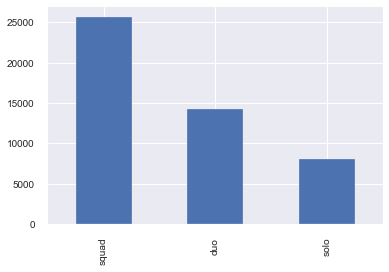

In [21]:
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
d['matchType'] = d['matchType'].apply(mapper)
d.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [3]:
df = pd.get_dummies(d['matchType'])

In [4]:
df.head()

,crashfpp,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
result = pd.concat([d, df], axis=1, sort=False)

In [6]:
result.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,0,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,0,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,0,0,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,0,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,0,0,0,0,0,1,0,0


In [7]:
result = result.drop(['matchType'], axis=1)

In [8]:
result = result.drop(['Id','groupId','matchId'], axis=1)
result.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
result = (result-result.min())/(result.max()-result.min())

In [10]:
result.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.59,0.571889,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.013826,0.0,0.0,0.0,0.56,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.045455,0.0,0.010278,0.0,0.0,0.0,0.46,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.004973,0.0,0.0,0.0,0.74,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.015115,0.0,0.0,0.0,0.44,0.000000,0.013889,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
result = result.dropna()
result.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.59,0.571889,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.013826,0.0,0.0,0.0,0.56,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.045455,0.0,0.010278,0.0,0.0,0.0,0.46,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.004973,0.0,0.0,0.0,0.74,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.015115,0.0,0.0,0.0,0.44,0.000000,0.013889,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
X = result[result.columns.difference(['winPlacePerc'])]
y = result['winPlacePerc']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [14]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2169057971.283341
betas = [-4.03841936e-01  3.36554100e-01  4.57290789e-01 -2.16905797e+09
 -2.16905797e+09  4.62562653e-01 -2.16905797e+09 -2.16905797e+09
 -2.16905797e+09 -2.16905797e+09  1.28513031e-01  4.78964552e-02
 -7.44183499e-01 -1.11576139e-01 -2.95735884e+00 -9.34726623e-01
 -6.31577273e-04 -3.57297390e-01  2.07805587e-01 -2.16905797e+09
 -2.16905797e+09 -2.16905797e+09 -2.16905797e+09 -2.16905797e+09
 -2.16905797e+09  4.69070768e-01  6.39012195e-01  4.82064721e-01
  7.28066825e-01  3.91731239e-01 -2.16905797e+09 -2.16905797e+09
 -2.16905797e+09 -2.16905797e+09  4.29089690e-01 -1.67075550e-01
  5.60451540e-02  2.83154442e+00  2.84769658e+00  3.00159285e-01]


In [15]:
import statsmodels.api as sm

In [16]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

/Users/mastermind/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 5.973e+05
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:58:22   Log-Likelihood:             3.0061e+06
No. Observations:             4446965   AIC:                        -6.012e+06
Df Residuals:                 4446925   BIC:                        -6.012e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
DBNOs               -0.4041      0.005  

In [17]:
import xgboost as xgb